# 판다스 시각화

데이터를 그리기 위해 필요한 라이브러리들을 임포트한다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 기본 그리기
시리즈를 사용해서 데이터를 시각해보자.

<AxesSubplot:>

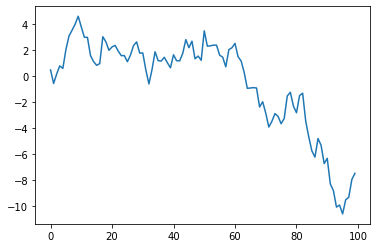

In [17]:
# 넘파이로 정규화된 데이터 100개를 구성하고 cumsum 사용해 누적합을 계산한다.
se0 = pd.Series(np.random.randn(100).cumsum())
se0.plot() # 메모리에 그림을 그려요. 
# plt.show()

<AxesSubplot:>

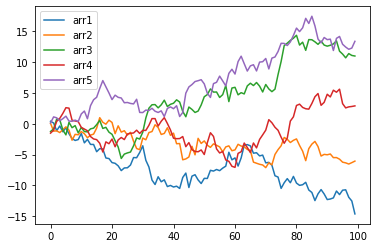

In [20]:
df = pd.DataFrame(np.random.randn(100, 5).cumsum(0),
                  columns= ['arr1', 'arr2', 'arr3', 'arr4', 'arr5'] )
df.plot()

## 막대 그래프 그리기

<AxesSubplot:>

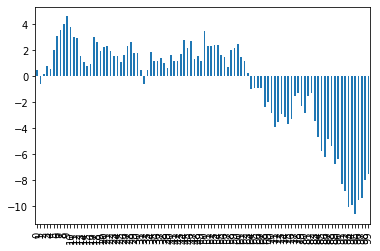

In [22]:
se0.plot(kind='bar')

<AxesSubplot:>

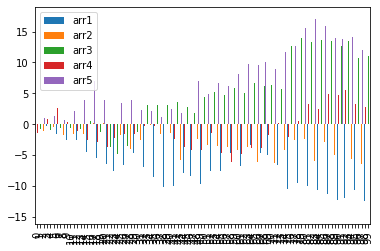

In [24]:
df.plot(kind='bar')

옆으로 바 차트 그리기

<AxesSubplot:>

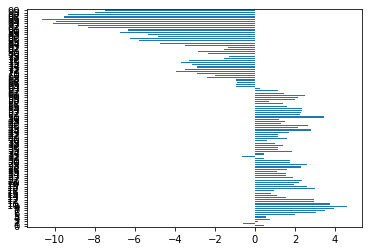

In [25]:
se0.plot(kind='barh')

<AxesSubplot:>

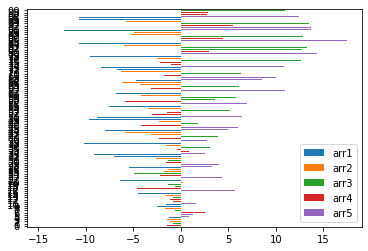

In [26]:
df.plot(kind='barh')

<AxesSubplot:>

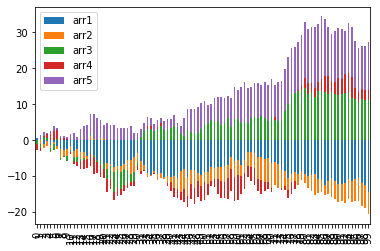

In [27]:
df.plot(kind='bar', stacked=True)

## 히스토그램
값의 빈도를 분리해서 출력

<AxesSubplot:>

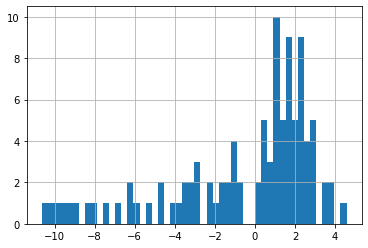

In [29]:
se0.hist(bins=50)

array([[<AxesSubplot:title={'center':'arr1'}>,
        <AxesSubplot:title={'center':'arr2'}>],
       [<AxesSubplot:title={'center':'arr3'}>,
        <AxesSubplot:title={'center':'arr4'}>],
       [<AxesSubplot:title={'center':'arr5'}>, <AxesSubplot:>]],
      dtype=object)

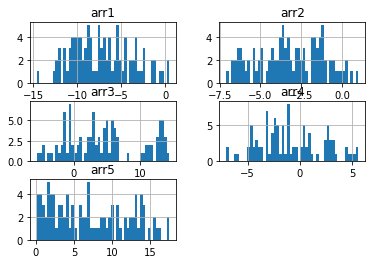

In [31]:
df.hist(bins=50)

## 커널 밀도 추정 그래프

<AxesSubplot:ylabel='Density'>

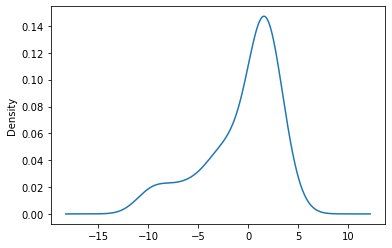

In [33]:
se0.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

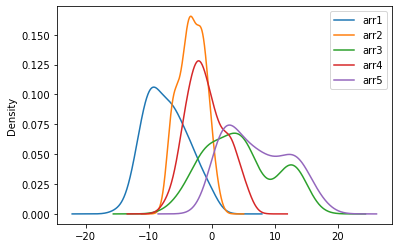

In [34]:
df.plot(kind='kde')

## 그래프 중첩 그리기

<AxesSubplot:ylabel='Density'>

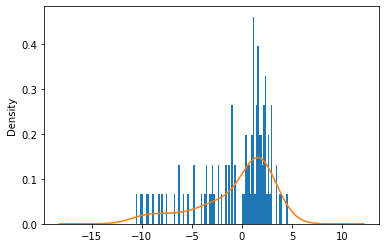

In [38]:
se0.hist(bins=100,  density=True)
se0.plot(kind='kde')

# iris 데이터를 활용한 산포도 그리기

In [40]:
from sklearn import datasets

iris = datasets.load_iris()
irisdt = pd.DataFrame(iris['data'], columns=iris['feature_names'])
irisdt

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


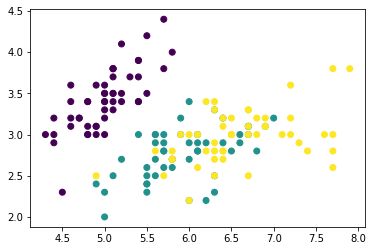

In [47]:
plt.scatter(irisdt['sepal length (cm)'], irisdt['sepal width (cm)'], c=iris.target)

## 연습문제
for 문을 사용해 iris 데이터의 12개의 그림을 모두 그려보자.

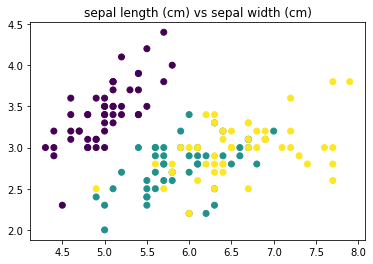

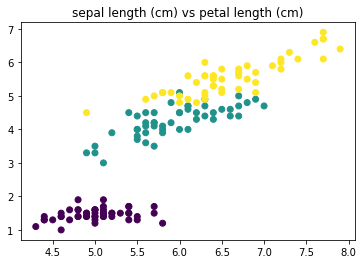

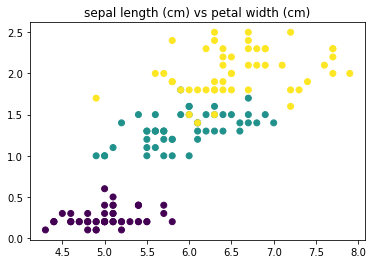

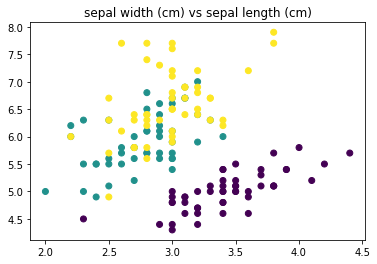

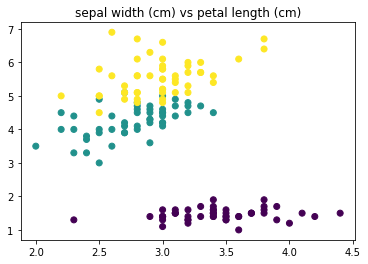

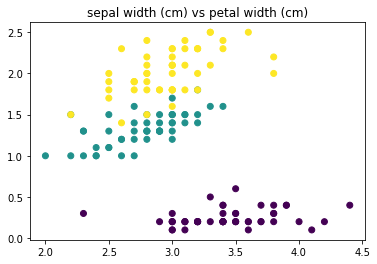

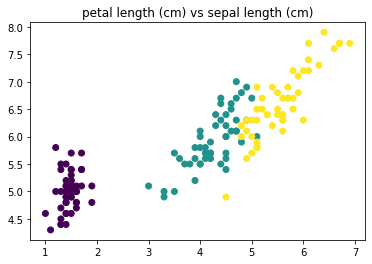

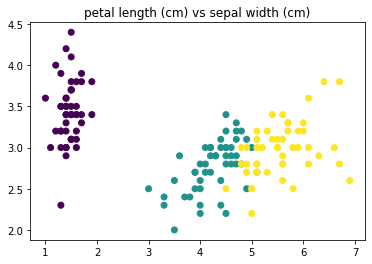

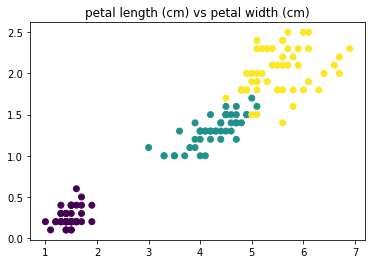

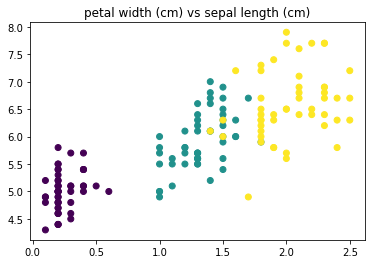

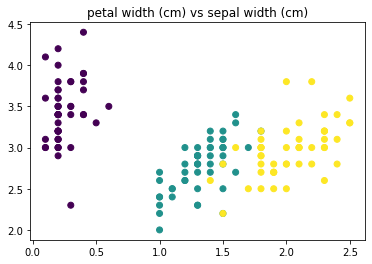

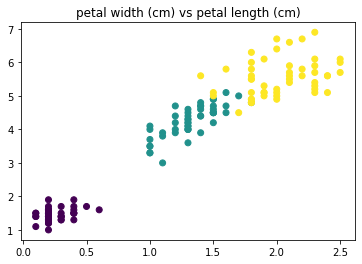

In [52]:
for f0 in iris['feature_names']: # irisdt에서는 columns 이름을 뽑아야 함
    for f1 in iris['feature_names']:
        if f0 == f1:
            continue
        plt.scatter(irisdt[f0], irisdt[f1], c=iris.target)
        plt.title(f"{f0} vs {f1}")
        plt.show()

피봇 테이블 만들기

In [61]:
csv_data = '''\
구분,죄종,발생검거,건수
중부,살인,발생,3
중부,살인,검거,2
중부,강도,발생,8
중부,강도,검거,8
중부,강간,발생,143
중부,강간,검거,105
'''

with open('중부 지역 강력 사건 발생 검거 통계.csv', 'w', encoding='UTF-8') as f:
    f.write(csv_data)

df = pd.read_csv('중부 지역 강력 사건 발생 검거 통계.csv')
pd.pivot_table(df, index=['죄종', '발생검거'], aggfunc=np.sum)

건수
죄종 발생검거     
강간 검거    105
   발생    143
강도 검거      8
   발생      8
살인 검거      2
   발생      3

# 타이타닉 생존자 분석 연습 문제
피봇 테이블을 사용해 데이터를 분석해봅시다.
1. 가장 많이 살아 남은 성별은 남녀 중 어느 쪽인가요?
2. 가장 많이 살아 남은 Class는 어디 인가요? (예: 1,2,3)
3. 가장 많이 살아 남은 연령대는 어느 연령대 인가요? (예: 30대)
4. 두 번째로 가장 많이 살아 남은 연령대는 어느 연령 대 인가요? (예: 30대)



In [65]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [81]:
# 1
titanic_df['Survived'].groupby(titanic_df['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [82]:
titanic_df.pivot_table(index=['Sex'])['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [91]:
# 2
titanic_df.pivot_table(index=['Pclass'], aggfunc=np.sum)['Survived']

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [89]:
titanic_df['Survived'].groupby(titanic_df['Pclass']).sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [111]:
# 3, 4
ages = []
for index, row in titanic_df.iterrows():
    ages.append((row['Age']//10) * 10)

titanic_df['ages'] = ages

titanic_df['Survived'].groupby(titanic_df['ages']).sum().sort_values(ascending=False)

ages
20.0    77
30.0    73
10.0    41
0.0     38
40.0    34
50.0    20
60.0     6
80.0     1
70.0     0
Name: Survived, dtype: int64

<AxesSubplot:xlabel='ages'>

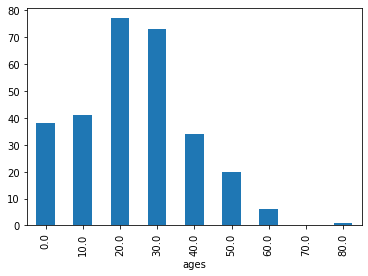

In [113]:
titanic_df['Survived'].groupby(titanic_df['ages']).sum().plot(kind='bar')

In [114]:
def age_to_ages(df):
    return 

titanic_df.apply()

890